# An exploratory look at arrests related to possession of cannabis in Chicago, IL 
### The data comes from [Chicago's Open Data Portal (a Socrata data service)](https://data.cityofchicago.org/Public-Safety/arrests/6ckw-ez9m)
#### The workup uses Python pandas and presents an initial map plot with geopandas

In [1]:
# importing pandas
import pandas as pd
import sys

In [2]:
df = pd.read_csv('../../../Crimes_-_2001_to_present.csv') #need to use API endpoint (for non local data)
# api endpoint https://data.cityofchicago.org/resource/6ckw-ez9m.json
# api general examples https://dev.socrata.com/consumers/getting-started.html
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11811230,JC412844,08/29/2019 11:55:00 PM,011XX N HARDING AVE,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,-87.725044,"(41.901427038, -87.725044239)",41.0,4299.0,24.0,456.0,45.0,5.0,16.0,66.0
1,11811246,JC412849,08/29/2019 11:54:00 PM,046XX S KEELER AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VEHICLE NON-COMMERCIAL,True,False,...,-87.728521,"(41.808939116, -87.72852063)",49.0,22248.0,54.0,591.0,8.0,56.0,13.0,105.0
2,11811245,JC412820,08/29/2019 11:53:00 PM,004XX W 31ST ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,...,-87.638669,"(41.838143106, -87.638668547)",26.0,21194.0,58.0,223.0,48.0,40.0,23.0,170.0
3,11811232,JC412835,08/29/2019 11:51:00 PM,093XX S GREENWOOD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,-87.597296,"(41.725328491, -87.597296088)",9.0,21546.0,43.0,472.0,35.0,61.0,19.0,246.0
4,11811219,JC412841,08/29/2019 11:50:00 PM,058XX S DR MARTIN LUTHER KING JR DR,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,ALLEY,False,False,...,-87.615826,"(41.788430122, -87.615825671)",53.0,22260.0,7.0,402.0,4.0,60.0,24.0,268.0


In [3]:
df_cann_bool = df.Description.str.contains("CANNABIS")
df_cann = df[df_cann_bool]
df_cann.size

9749610

In [4]:
print("About " + str(round(df_cann.size / df.size * 100))
      + "% of all arrests have 'CANNABIS' in the desription")

About 5.0% of all arrests have 'CANNABIS' in the desription


In [5]:
unique_description = pd.Series(df_cann.Description.unique())
print("There are " + str(len(unique_description)) 
      + " unique occurences of arrests with 'CANNABIS' in the description")
print('These are:')
for blah in unique_description:
    print(blah)

There are 8 unique occurences of arrests with 'CANNABIS' in the description
These are:
MANU/DEL:CANNABIS OVER 10 GMS
POSS: CANNABIS 30GMS OR LESS
MANU/DEL:CANNABIS 10GM OR LESS
POSS: CANNABIS MORE THAN 30GMS
DELIVER CANNABIS TO PERSON <18
CANNABIS PLANT
ATTEMPT POSSESSION CANNABIS
CALCULATED CANNABIS CONSPIRACY


'POSS: CANNABIS 30GMS OR LESS' is especially relevant to expungement because this level of possession is legal Jan. 1, 2020 according to IL ['Cannabis Regulation and Tax Act'](http://www.ilga.gov/legislation/101/HB/PDF/10100HB1438lv.pdf)

In [6]:
bool_30g_or_less = df_cann.Description.str.contains("POSS: CANNABIS 30GMS OR LESS")
df_30g_or_less = df_cann[bool_30g_or_less]
df_30g_or_less.size

8330730

In [7]:
print("This represents about " 
      + str(round(df_30g_or_less.size / df_cann.size * 100))
      + "% of arrests with 'CANNABIS' in the desription")

This represents about 85.0% of arrests with 'CANNABIS' in the desription


## Let's repeat that to be clear:
### 85% of arrests in Chicago related to cannabis in the last ~20 years would be legal activity January 1, 2020 and are *likely* eligible for automatic expungement
In this simple dataset, that represents ~830,000 arrests

In [8]:
# if you want to visualize this data in the notebook, geopandas is an easy one
# the following workaround comes from Jake VanderPlas 
# (https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)
!conda install --yes --prefix {sys.prefix} geopandas
# otherwise global install with pip
# !{sys.executable} -m pip install numpy

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda




In [9]:
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [10]:
# create GeoDataFrame from shapely geometry objects
# credit to Ryan Stuart
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
crs = { "init" : "epsg:4326" } #coordinate reference system
geom = [Point(xy) for xy in zip(df_30g_or_less.Longitude, 
                                df_30g_or_less.Latitude)]
geo_df = geopandas.GeoDataFrame(df_30g_or_less,
                                crs=crs,
                                geometry=geom)
geo_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,geometry
92,11811208,JC412738,08/29/2019 09:34:00 PM,067XX S STONY ISLAND AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,"(41.772882101, -87.586293688)",32.0,22260.0,39.0,381.0,33.0,24.0,18.0,212.0,POINT (-87.586293688 41.772882101)
182,11810967,JC412582,08/29/2019 07:42:00 PM,033XX W 56TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,"(41.791634939, -87.707751858)",49.0,21867.0,61.0,801.0,8.0,58.0,13.0,129.0,POINT (-87.70775185799999 41.791634939)
301,11810853,JC412411,08/29/2019 04:52:00 PM,013XX S CENTRAL PARK AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SMALL RETAIL STORE,True,False,...,"(41.864177046, -87.715356764)",36.0,21569.0,30.0,33.0,14.0,57.0,21.0,153.0,POINT (-87.71535676399999 41.864177046)
958,11809728,JC411130,08/28/2019 05:21:00 PM,092XX S ASHLAND AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,VEHICLE NON-COMMERCIAL,True,False,...,"(41.726212389, -87.662796973)",18.0,21554.0,72.0,632.0,13.0,59.0,9.0,245.0,POINT (-87.662796973 41.726212389)
1116,11809427,JC410761,08/28/2019 01:01:00 PM,054XX S LAFLIN ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,"(41.794352449, -87.66216423)",19.0,14924.0,59.0,790.0,4.0,37.0,23.0,127.0,POINT (-87.66216423 41.794352449)


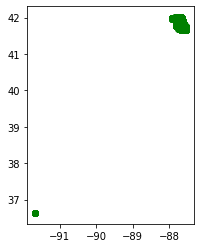

In [11]:
%matplotlib inline
fig, ax = plt.subplots()
geo_df.plot(ax = ax, color = 'green')

### It is clear there are two data points far outside of the city of Chicago (typos?)

#### We will filter them out in the pandas dataframe using a boolean mask (as done before to filter the arrest 'Description'), and in doing so, also filter the null values (~6000 entries)

In [12]:
bool_geo = df_30g_or_less.Longitude > -90
df_final = df_30g_or_less[bool_geo]

In [13]:
# this is a simple command to save this data as a csv
# size is still too large uncompressed to be hosted on freemium github 
df_final.to_csv("Possession_30g_or_less-_2001_to_present.csv")